In [1]:
# this is my script for monday 
library("vegan")

ERROR: Error in library("vegan"): there is no package called ‘vegan’


In [2]:
install.packages("vegan")
library("vegan")

also installing the dependencies ‘permute’, ‘cluster’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: permute

Loading required package: lattice



In [3]:
install.packages("cluster")
library("cluster")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
ponds_url <- "https://bit.ly/pondsfull"
ponds <- read.csv(url(ponds_url))

In [7]:
#colnames
names(ponds)

[1] "AC001A"       "AC013A"       "AC013E"       "AM011A"       "AM012A"      
 [6] "AS001A"       "AU002A"       "AU003B"       "CC001A"       "CC002A"      
[11] "CC9997"       "CM004A"       "CO001A"       "CY002A"       "CY003A"      
[16] "CY009A"       "CY011A"       "FR001A"       "FR002A"       "FR002C"      
[21] "FR006A"       "FR006E"       "FR009B"       "FR018A"       "FR019A"      
[26] "GO013A"       "NA004A"       "NA007A"       "NA022A"       "NA042A"      
[31] "NA114A"       "NI009A"       "NI014A"       "NI015A"       "NI083A"      
[36] "NI196A"       "NI9969"       "NI9971"       "OP001A"       "ST001A"      
[41] "ST002A"       "ST010A"       "SU016A"       "SY002A"       "SY003A"      
[46] "SY003C"       "SY010A"       "UN9992"       "pH"           "Conductivity"
[51] "Alkalinity"   "TP"           "SiO2"         "NO3"          "Na"          
[56] "K"            "Mg"           "Ca"           "Cl"           "SO4"         
[61] "Chla"         "Secchi"       "Maxdepth"

In [9]:
#rownames
rownames(ponds)

[1] "4"   "7"   "31"  "34"  "37"  "42"  "50"  "53"  "57"  "58"  "65"  "69" 
[13] "73"  "74"  "76"  "79"  "82"  "83"  "85"  "86"  "98"  "100" "101" "105"
[25] "107" "108" "112" "113" "114" "120"

In [10]:
#structure
str(ponds)

'data.frame':	30 obs. of  63 variables:
 $ AC001A      : num  0 0.36 0.9 0.17 0 ...
 $ AC013A      : num  0.55 3.4 1.08 0.52 6.84 ...
 $ AC013E      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AM011A      : num  0.74 1.07 0.9 0.69 2.54 0 0 0.94 0.34 0.34 ...
 $ AM012A      : num  0.92 8.05 5.39 0.35 2.34 0.73 0 0 0.34 0 ...
 $ AS001A      : num  1.66 0.36 0 0 0.19 0.36 2.4 2.83 0 1.18 ...
 $ AU002A      : num  4.6 0 0 0 0 ...
 $ AU003B      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CC001A      : num  0 2.15 0 9.69 0 0 0.2 0 0 0 ...
 $ CC002A      : num  0 3.4 0.18 7.96 0 0 0.2 2.26 0 0 ...
 $ CC9997      : num  0 0 0.18 15.23 0 ...
 $ CM004A      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CO001A      : num  0.18 3.94 0.72 0.52 2.15 0.91 2.4 0 0 4.06 ...
 $ CY002A      : num  1.11 1.97 0 3.46 0.59 ...
 $ CY003A      : num  0 3.04 0 2.77 0.19 0 1.2 0.94 0.17 1.35 ...
 $ CY009A      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CY011A      : num  0 0.72 0 9.17 0 0 0.2 0.75 0 0 ...
 $ FR001A      : num  3.13 3.22 2.15 2.77 1.17

In [11]:
head(ponds)

,AC001A,AC013A,AC013E,AM011A,AM012A,AS001A,AU002A,AU003B,CC001A,CC002A,⋯,NO3,Na,K,Mg,Ca,Cl,SO4,Chla,Secchi,Maxdepth
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.00,0.55,0,0.74,0.92,1.66,4.60,0,0.00,0.00,⋯,-0.0333169,2.58659,1.89900,2.66464,3.55215,2.79134,3.21365,1.51904,0.836660,1.73205
7,0.36,3.40,0,1.07,8.05,0.36,0.00,0,2.15,3.40,⋯,0.1956870,3.09499,2.38605,2.78050,3.72860,3.21531,3.28931,2.29684,0.774597,1.09545
31,0.90,1.08,0,0.90,5.39,0.00,0.00,0,0.00,0.18,⋯,-0.0300826,2.79169,2.38337,2.58855,3.65050,2.79675,3.08332,2.43457,1.341640,1.09545
34,0.17,0.52,0,0.69,0.35,0.00,0.00,0,9.69,7.96,⋯,0.1511100,3.09316,2.16137,2.48180,3.45052,3.05269,2.99112,2.00415,0.547723,1.00000
37,0.00,6.84,0,2.54,2.34,0.19,0.00,0,0.00,0.00,⋯,0.7469330,2.63699,1.71391,2.21285,3.53615,2.73838,2.76938,1.19201,1.483240,1.41421
42,0.18,0.91,0,0.00,0.73,0.36,14.03,0,0.00,0.00,⋯,-0.0293996,2.58799,1.65079,2.14613,3.33425,2.68753,2.55841,2.18594,0.741620,1.30384


In [13]:
#create a subset of ponds df with pH and max depth
pondsenv <- subset(ponds, select = pH:Maxdepth)
#scale to standardize
pondsenv <- scale(pondsenv, scale = TRUE, center = FALSE)

In [23]:
#single link nearest neighbor clustering of the pondsenv data
env.ed <- vegdist(pondsenv, method = "euclidean") #euclidean distance
pond.slink <- hclust(env.ed, method = "single") #hierarchal cluster on dissimilarities 
pond.slink #visualize



Call:
hclust(d = env.ed, method = "single")

Cluster method   : single 
Distance         : euclidean 
Number of objects: 30 


[1] 0.5318913

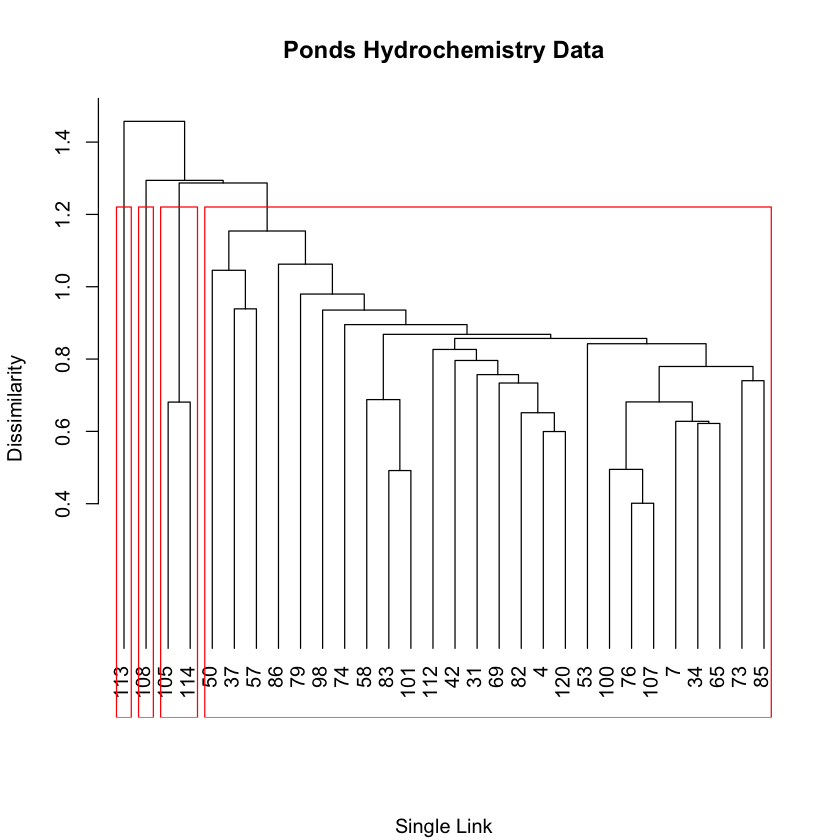

In [30]:
#dendogram of cluster analysis 
plot(pond.slink, hang = -0.01, main = "Ponds Hydrochemistry Data",
     sub = "Single Link", ylab = "Dissimilarity", xlab = "")
#cutting the dendogram into 4 groups and outlining in red box
rect.hclust(pond.slink, k = 4, border = "red")
#calculating the cophenetic correlation and distance
cor(coph.slink <- cophenetic(pond.slink), env.ed)

#definitely see evidence of chaining 

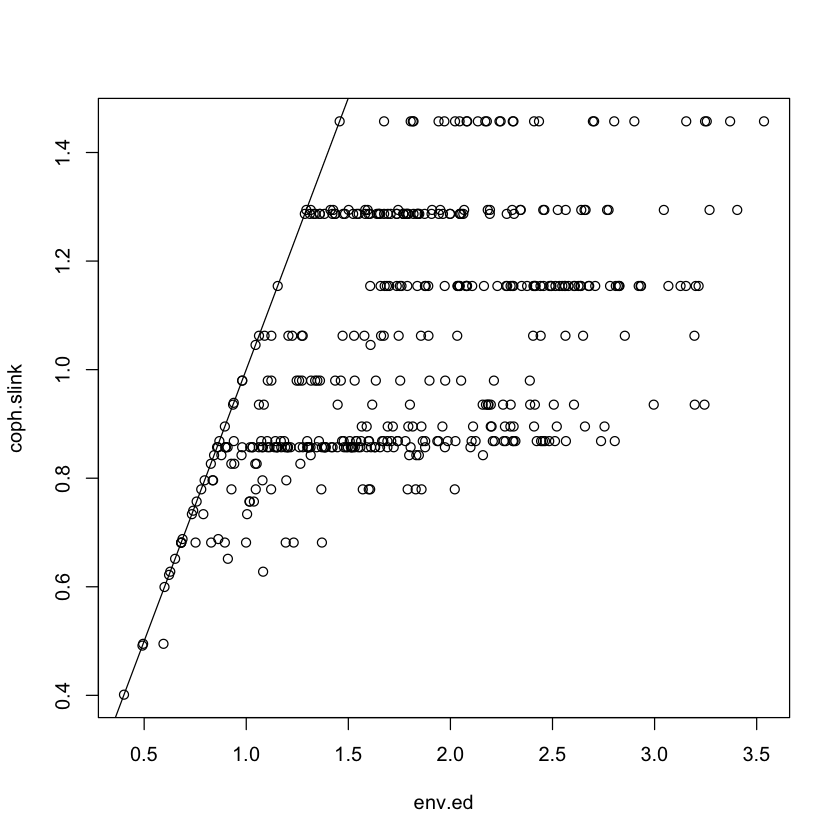

In [26]:
#shepard line plot 
#original distances are plotted on the x and coph distances plotted on the y
#If the dendrogram were able to fully represent the original distances, all the points would fall on the one to one line.
plot(env.ed, coph.slink)
abline(a = 0, b = 1)

In [27]:
# What does the Shepard-like plot indicate about the faithfulness of the nearest neighbour dendrogram in representing the original Euclidean distances?
#shepard-like plot says that up until cophenetic distance of 1, the single euclidean dendogram is reliable but not so faithful after 1.0


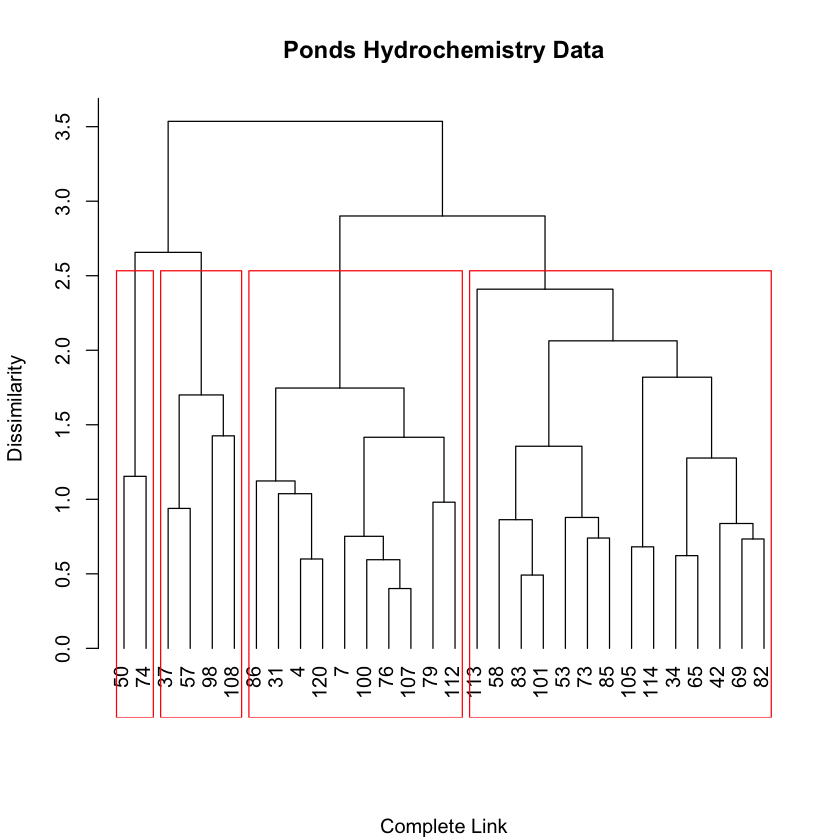

In [28]:
# complete link
pond.clink <- hclust(env.ed, method = "complete")
plot(pond.clink, hang = -0.01, main = "Ponds Hydrochemistry Data",
     sub = "Complete Link", ylab = "Dissimilarity", xlab = "")
rect.hclust(pond.clink, k = 4, border = "red")

In [29]:
#cophenetic distance for complete link
cor(coph.clink <- cophenetic(pond.clink), env.ed)

[1] 0.6543283

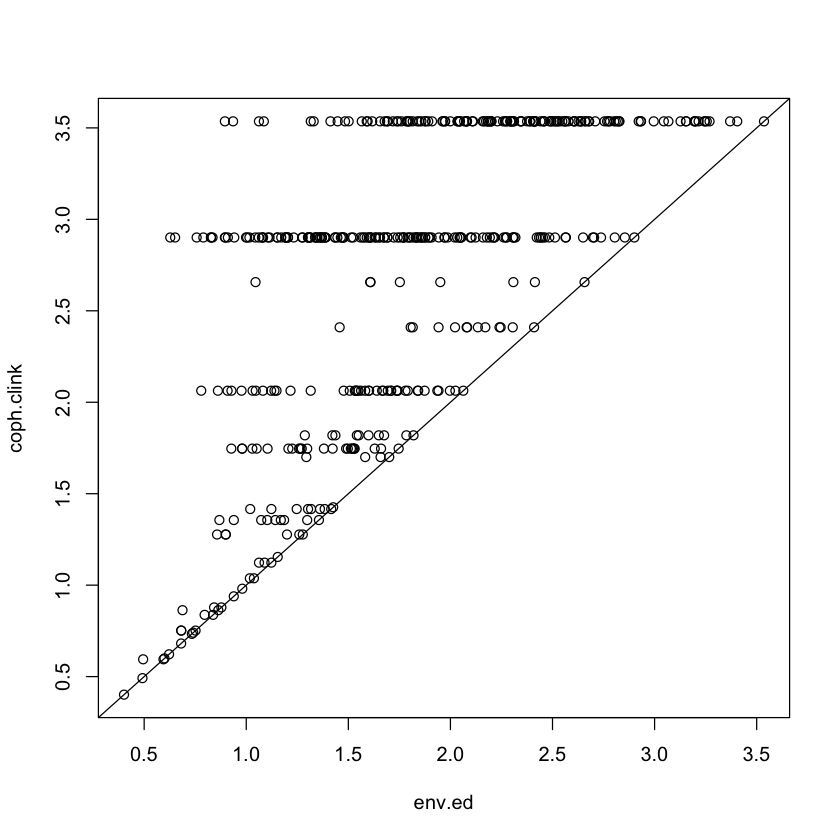

In [31]:
#shepard-like plot for complete link
plot(env.ed, coph.clink)
abline(a = 0, b = 1)

In [32]:
#similar reliability to single link but reliability goes up past 1.5 coph distance


[1] 0.7093294

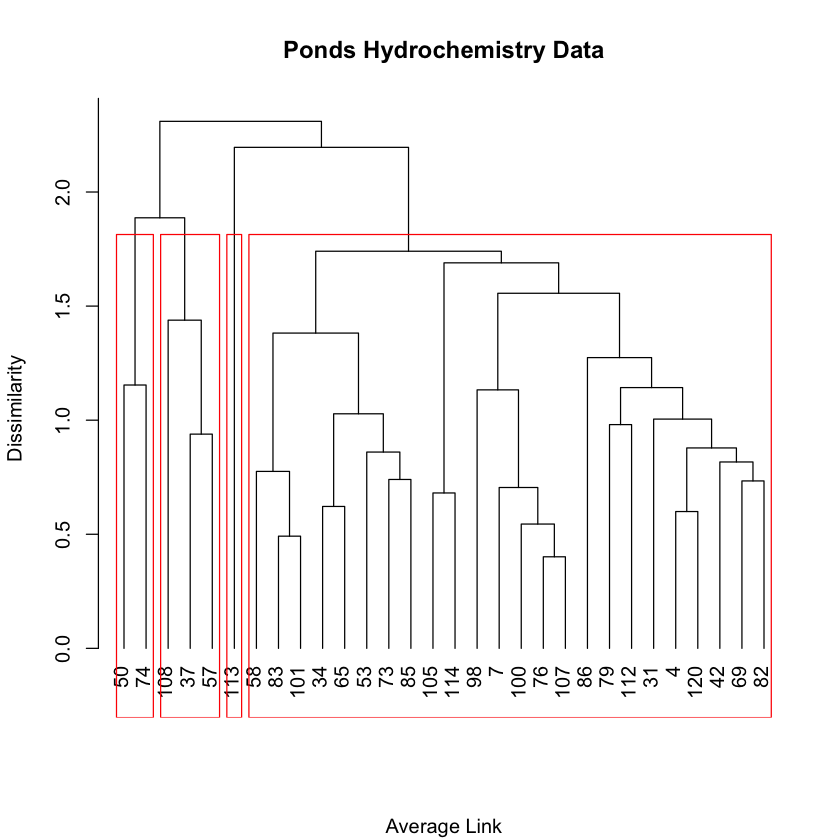

In [33]:
# average link
pond.avg <- hclust(env.ed, method = "average")
plot(pond.avg, hang = -0.01, main = "Ponds Hydrochemistry Data",
     sub = "Average Link", ylab = "Dissimilarity", xlab = "")
rect.hclust(pond.avg, k = 4, border = "red")
cor(coph.avg <- cophenetic(pond.avg), env.ed)

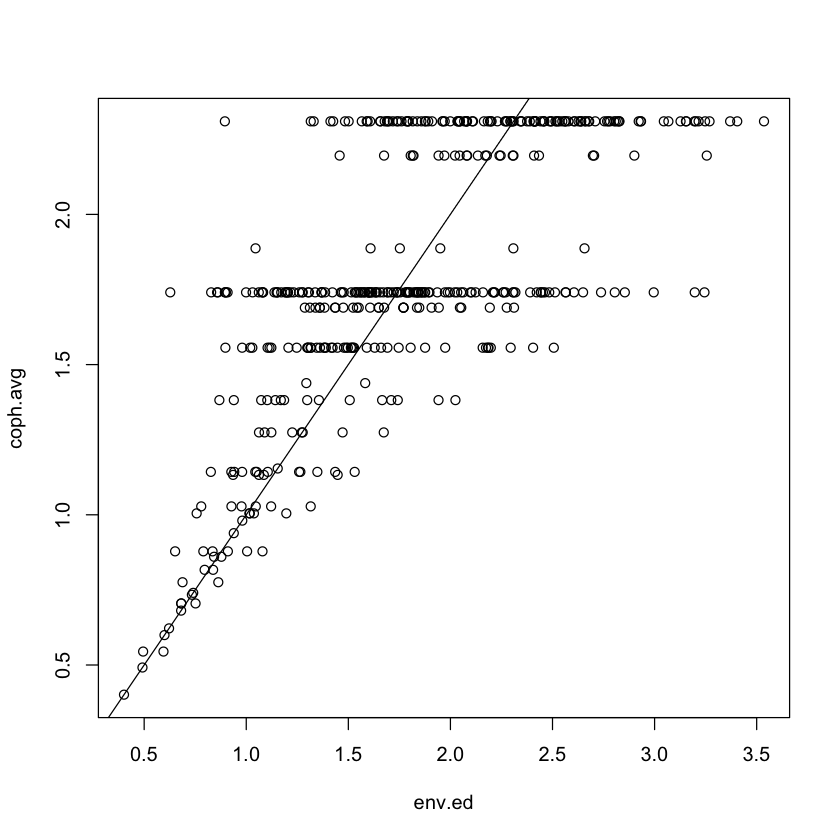

In [35]:
#interesting isolates 113 as its own cluster
#cophonetic distance closer to 1
#shepard-like plot
plot(env.ed, coph.avg)
abline(a = 0, b = 1)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



[1] 0.5672972

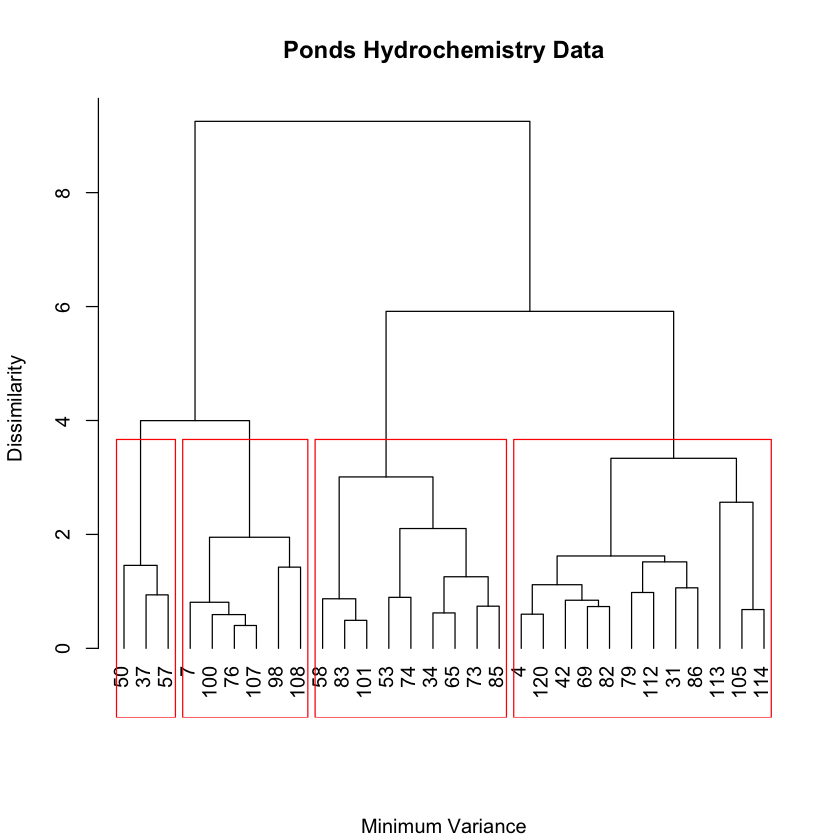

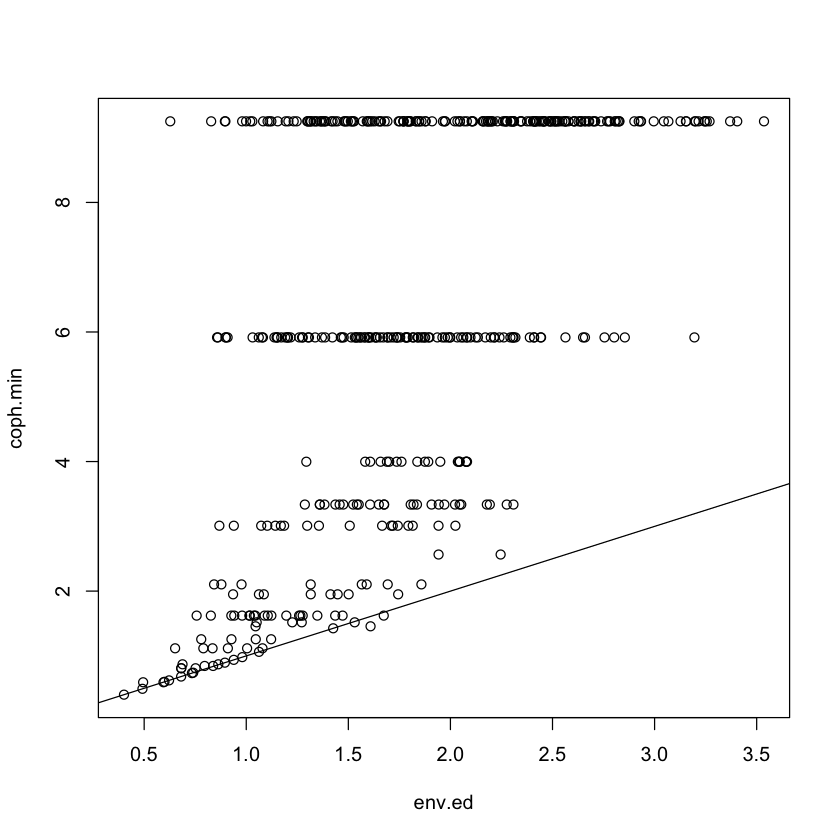

In [36]:
# Ward's minimum variance clustering
pond.min <- hclust(env.ed, method = "ward")
plot(pond.min, hang = -0.01, main = "Ponds Hydrochemistry Data",
     sub = "Minimum Variance", ylab = "Dissimilarity", xlab = "")
rect.hclust(pond.min, k = 4, border = "red")
cor(coph.min <- cophenetic(pond.min), env.ed)
plot(env.ed, coph.min)
abline(a = 0, b = 1)

In [37]:
#seems to be the worst reliability, second lowest coph correlation 

[1] 0.7481309

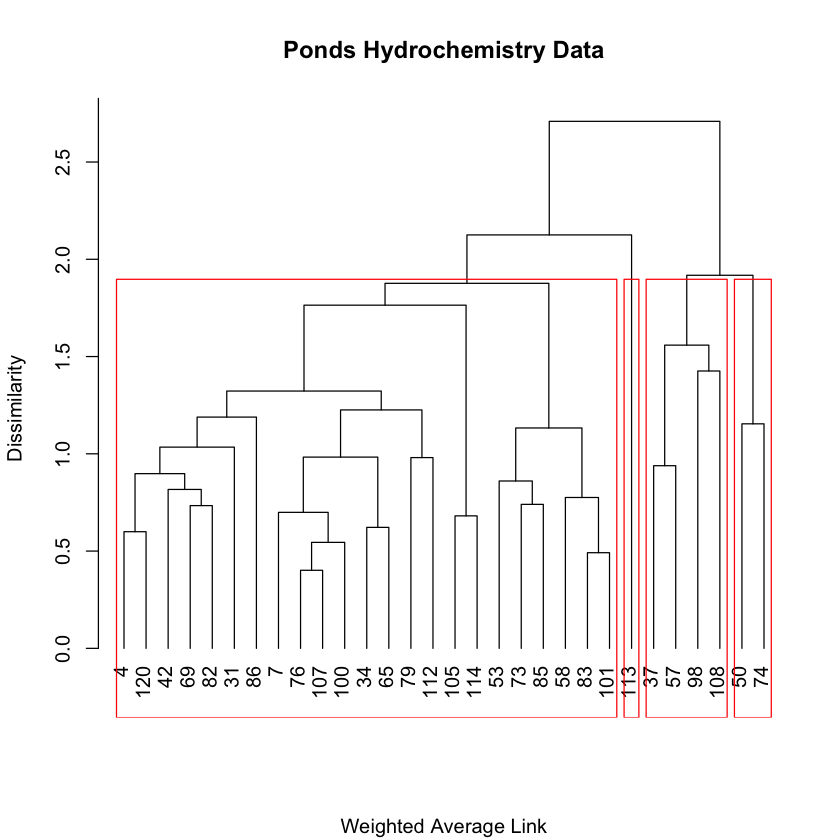

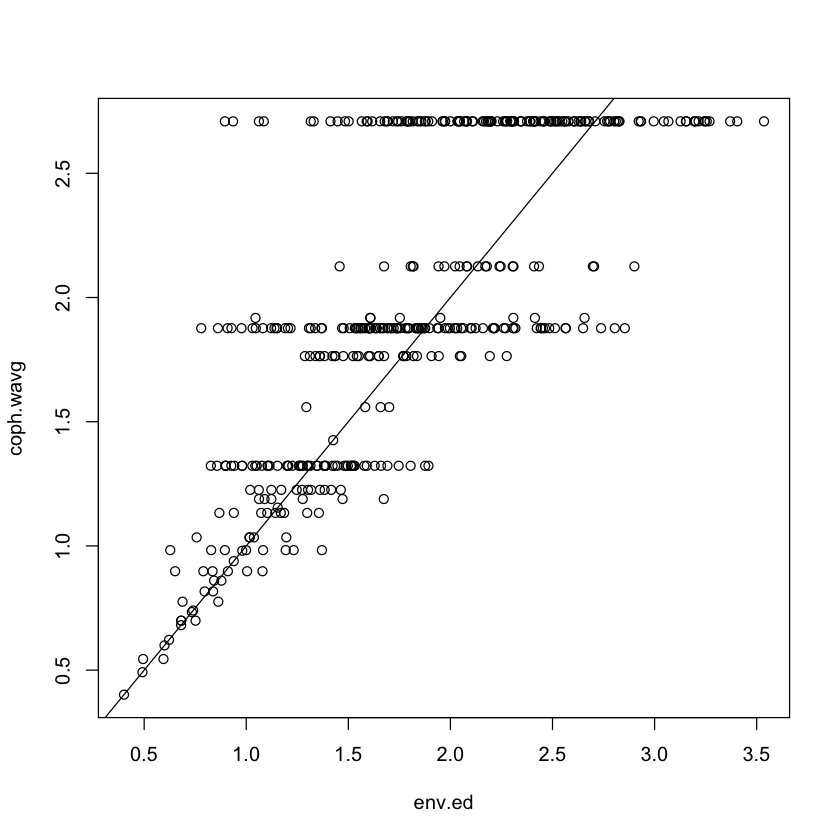

In [38]:
# weighted average link
require("cluster")
pond.wavg <- agnes(env.ed, method = "weighted") #weighted avg not implemented in base R use agnes from cluster pkg to convert into hcluster 
pond.wavg <- as.hclust(pond.wavg)
plot(pond.wavg, hang = -0.01, main = "Ponds Hydrochemistry Data",
     sub = "Weighted Average Link", ylab = "Dissimilarity", xlab = "")
rect.hclust(pond.wavg, k = 4, border = "red")
cor(coph.wavg <- cophenetic(pond.wavg), env.ed)
plot(env.ed, coph.wavg)
abline(a = 0, b = 1)

In [39]:
#compare coph disatnces in all clusters
cor(cbind(coph.slink, coph.clink, coph.avg, coph.wavg, coph.min, env.ed))

,coph.slink,coph.clink,coph.avg,coph.wavg,coph.min,env.ed
coph.slink,1.0000000,0.3545052,0.6246113,0.5416554,0.1905182,0.5318913
coph.clink,0.3545052,1.0000000,0.7001381,0.8023645,0.4645943,0.6543283
coph.avg,0.6246113,0.7001381,1.0000000,0.8110084,0.5285280,0.7093294
coph.wavg,0.5416554,0.8023645,0.8110084,1.0000000,0.4231211,0.7481309
coph.min,0.1905182,0.4645943,0.5285280,0.4231211,1.0000000,0.5672972
env.ed,0.5318913,0.6543283,0.7093294,0.7481309,0.5672972,1.0000000


In [ ]:
#Are any of the clusterings closely correlated with each other and with the original Euclidean distances?

#yes! i believe weighted average and complete link are closely correlated
#the most closely related to the original euclidean env.ed are weighted avg and average link


In [ ]:
                    #K-MEANS CLUSTERING 